<a href="https://colab.research.google.com/github/eunhaday/AIFFEL_quest_cr/blob/master/Exploration/SQUest27/exp06_stable_diffusion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Diffusers를 설치

!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 42.1 MB/s eta 0:00:00


In [1]:
# Text-to-Image Generation 파이프라인을 불러오기

import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

device = "cuda"

# 파이프라인 불러오기
repo_id = "stabilityai/stable-diffusion-2-base"
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
prompt = "a photograph of an monkey riding a horse"

In [21]:
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

  0%|          | 0/50 [00:00<?, ?it/s]

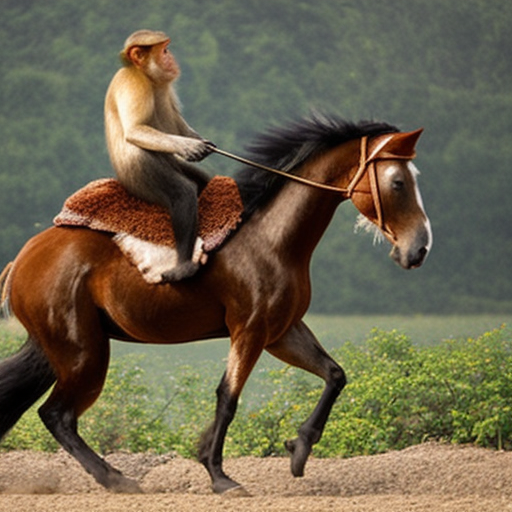

In [22]:
# Now to display an image you can either save it such as:
image.save(f"/content/drive/MyDrive/Colab Notebooks/Data/image.png")

# or if you're in a google colab you can directly display it with
image

In [ ]:
# 이미지 저장 폴더 만들기
import os
os.mkdir("/content/drive/MyDrive/Colab Notebooks/aiffel_diffusers")    # diffusers 폴더를 이미 만들었다면 주석 처리해 주세요.

#### Text-to-Image Generation
 * 하나의 이미지 생성하기

  0%|          | 0/50 [00:00<?, ?it/s]

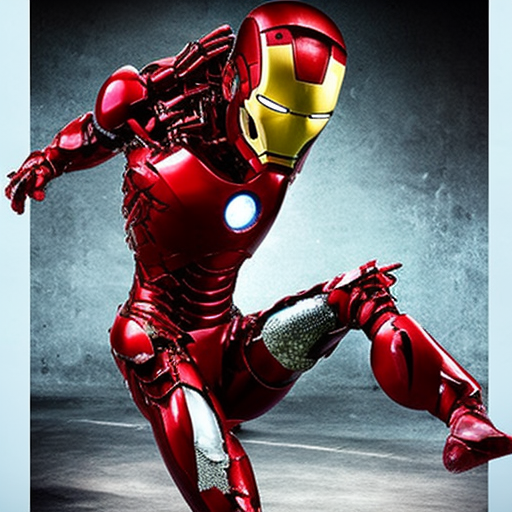

In [43]:
prompt = "Iron Man Ballet Pictures"
#"Pretty 20s sister photo"
#"A photo of a Korean grandmother smiling kindly"
#"Photo of a shorthair cat stretching"
#"A photo of a shorthaired cat looking at flowers"
#"a colorful drawing of a flying cat in the sky"

# 입력한 프롬프트를 사용하여 이미지 생성
image = pipe(prompt, num_inference_steps=50).images[0]
#image = pipe(prompt).images[0]

# 이미지 저장
image.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_diffusers/image_7.png")

# 이미지 출력
image

### 여러 개의 이미지 생성하기
* 이미지 처리를 해주는 파이썬 라이브러리인 pillow를 사용

In [44]:
# 파이썬 이미지 처리 라이브러리 pillow 불러오기
from PIL import Image

# 틀 만들기
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box = (i%cols * w, i // cols * h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

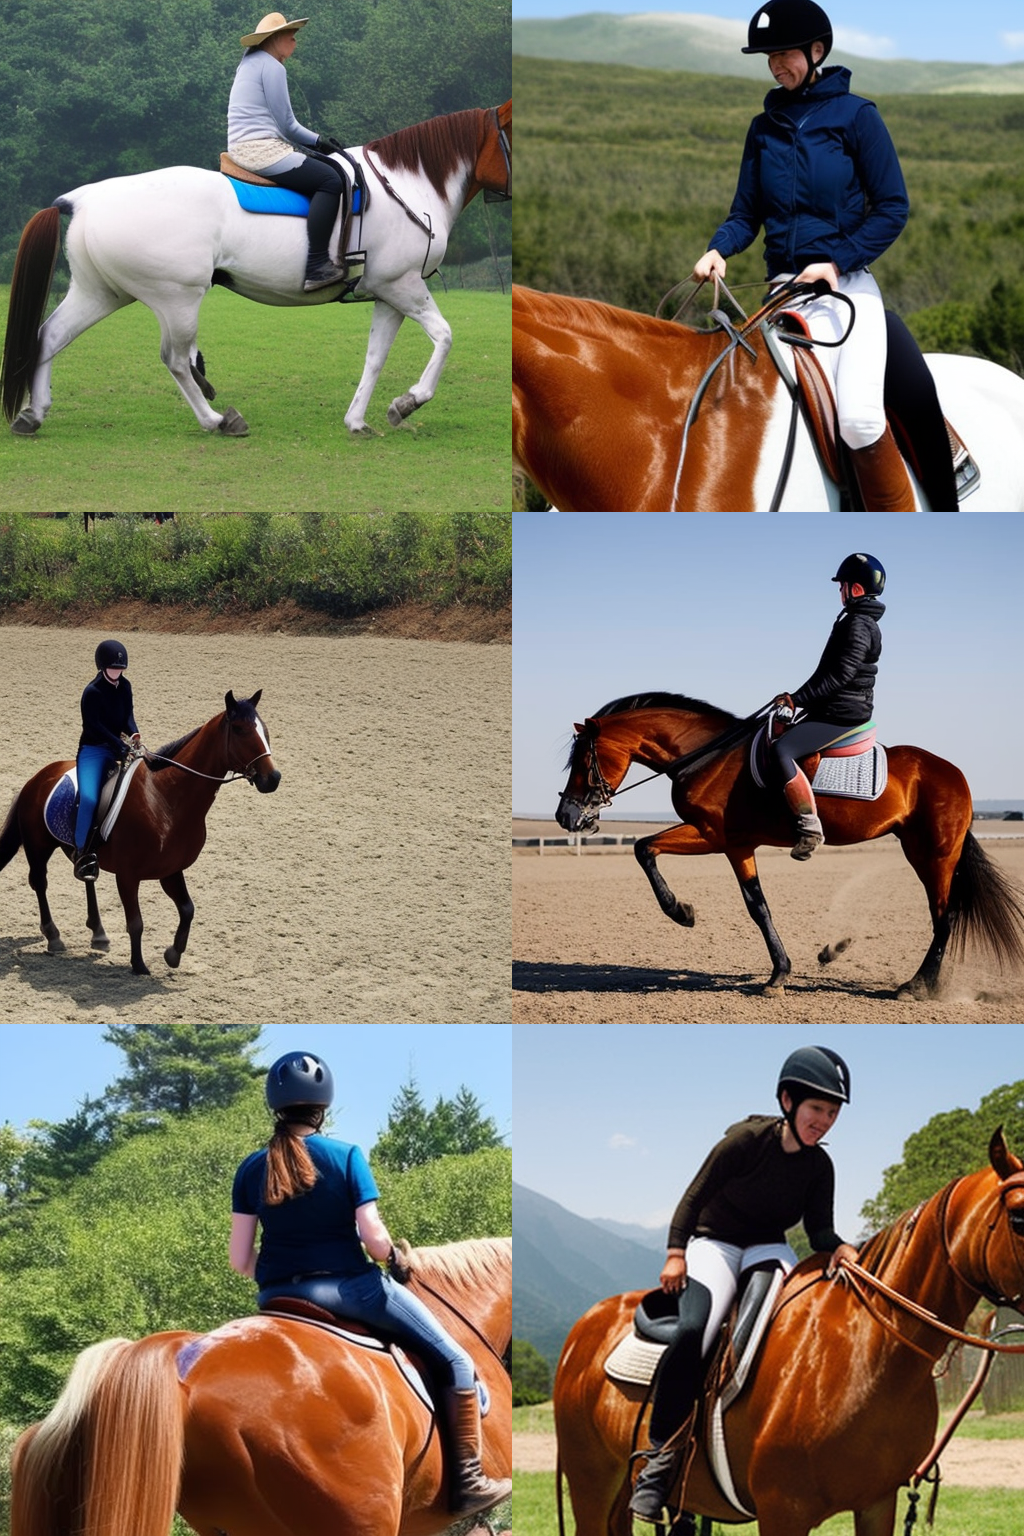

In [47]:
# 이미지의 개수
num_images = 6

# 프롬프트 입력
prompt = ['a horse riding a person'] * num_images

# 이미지 생성
images = pipe(prompt).images

# 이미지 저장
for i, img in enumerate(images):
    img.save(f"/content/drive/MyDrive/Colab Notebooks/aiffel_diffusers/image1_{i+1}.png")  # 각 이미지를 "image1_1.png", "image1_2.png"로 저장

# 이미지 출력
grid = image_grid(images, rows= 3, cols= 2)
grid

In [ ]:
# GPU 메모리를 지우는 코드입니다.
torch.cuda.empty_cache()

# Image-to-Image Generation
* 프롬프트뿐 아니라 이미지를 입력으로 넣으면 다른 이미지로 변형시켜 주는 기능
* Diffusers에는 이 기능이 포함된 파이프라인을 이미 만들어 두었기 때문에 파이프라인을 불러오기만 하면 쉽게 모델을 사용할 수 있음

In [48]:
# Image-to-Image Generation 파이프라인 불러오기
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#### 하나의 이미지 생성하기

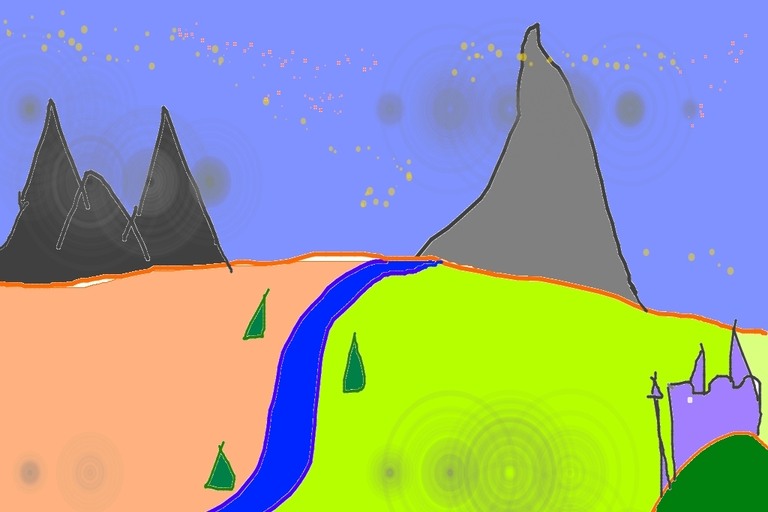

In [49]:
# 허깅페이스에서 제공하는 기본 이미지를 사용

import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# url 호출하기
response = requests.get(url)

# 이미지 열기(인터넷에 있는 이미지를 가져온 경우)
init_img = Image.open(BytesIO(response.content)).convert("RGB")  # 이미지를 메모리로 읽어와서 RGB로 변경합니다.
init_img = init_img.resize((768, 512))  # 이미지의 크기를 조절합니다.
init_img

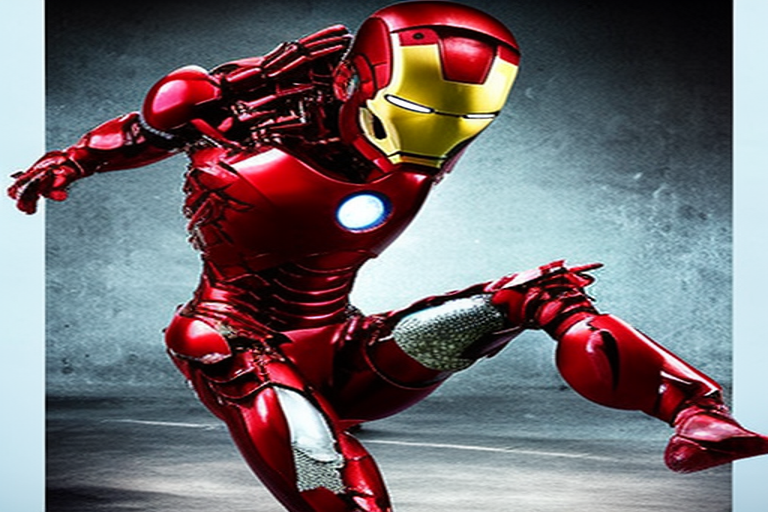

In [50]:
# 이미지 열기(디렉토리에 있는 이미지를 읽어오는 경우)
init_img = Image.open("/content/drive/MyDrive/Colab Notebooks/aiffel_diffusers/image_7.png", mode = 'r')
init_img = init_img.resize((768, 512))
init_img

In [ ]:
# 불러온 이미지를 내가 원하는 스타일로 변경할 수 있도록 프롬프트를 작성

